# Introduction to dataset.

**Project Title**: Music & Mental Health Survey Results.

**Project description**: Music therapy(MT) is the use of music to improve an individual's stress, mood, and overall mental health.**The dataset aims** to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.
These findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

Objectives of the analysis:

1.  Is there a relation between some genre and mental health problems?
2.  Which `music streaming service` is used widely among respondents?
3.  How does `exploratory` change with age?
4.  Which do age categories listen to music `while working/studying`?
5.  Which do age respondents spend more time on listening to music per day?
6.  Is there a relation between `instrumentalist` and `composer` categories?
7.  Which genre is widely listened?












Import the preliminary modules that will be used in this project.
Import dataset into df, check its contents.

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

# Wrangling and preparing data

Shorten the name of column - "Primary streaming service"\
To have some consistency across column names, we will iterate over the column names of our dataset and convert them all to lowercase using the `map()` and `lower()` functions.

In [6]:
# df['Age'] = df['Age'].apply(np.int64)
df.columns = map(str.lower, df.columns)
df = df.rename({"primary streaming service":"music platform"}, axis=1)

Identify the number of missing values in each column:

In [7]:
df.isna().sum()

timestamp                         0
age                               1
music platform                    1
hours per day                     0
while working                     3
instrumentalist                   4
composer                          1
fav genre                         0
exploratory                       0
foreign languages                 4
bpm                             107
frequency [classical]             0
frequency [country]               0
frequency [edm]                   0
frequency [folk]                  0
frequency [gospel]                0
frequency [hip hop]               0
frequency [jazz]                  0
frequency [k pop]                 0
frequency [latin]                 0
frequency [lofi]                  0
frequency [metal]                 0
frequency [pop]                   0
frequency [r&b]                   0
frequency [rap]                   0
frequency [rock]                  0
frequency [video game music]      0
anxiety                     

Fill na values of **Age** and BPM column:

In [8]:
df['age'].fillna(value = int(np.mean(df["age"])), inplace=True)
df['bpm'].fillna(value = np.mean(df["bpm"]), inplace=True)
df.isna().sum()

timestamp                       0
age                             0
music platform                  1
hours per day                   0
while working                   3
instrumentalist                 4
composer                        1
fav genre                       0
exploratory                     0
foreign languages               4
bpm                             0
frequency [classical]           0
frequency [country]             0
frequency [edm]                 0
frequency [folk]                0
frequency [gospel]              0
frequency [hip hop]             0
frequency [jazz]                0
frequency [k pop]               0
frequency [latin]               0
frequency [lofi]                0
frequency [metal]               0
frequency [pop]                 0
frequency [r&b]                 0
frequency [rap]                 0
frequency [rock]                0
frequency [video game music]    0
anxiety                         0
depression                      0
insomnia      

converting Age column to int:

In [9]:
df['age'] = df['age'].apply(np.int64)

# Explotary Statistics of data

 Exploring **Age** column:

In [10]:
mean_age = np.mean(df['age']) 
print("Mean age: " + str(int(mean_age)))
std_age = np.std(df['age'])
print("Standard deviation of age values: " + str(int(std_age)))
max_age = np.max(df['age'])
min_age = np.min(df['age'])
print("max age: " + str(int(max_age)))
print("min age: " + str(int(min_age)))

Mean age: 25
Standard deviation of age values: 12
max age: 89
min age: 10


Age is right-skewed distributed with mode 18-24 age.It means survey is passed largely for this age of people. We can also notice the outliers after 40+ ages.

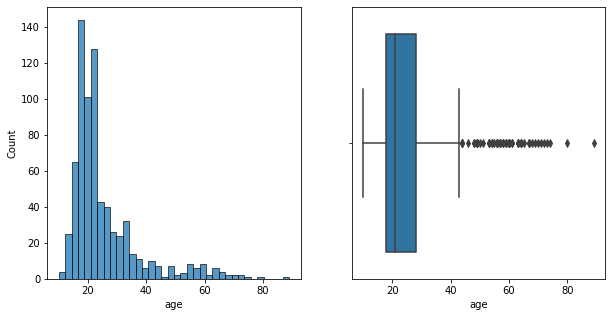

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(x='age', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='age', data=df)
plt.show()

Pie chart below shows that most of respondents use *Spotify* and YouTube music streaming services.

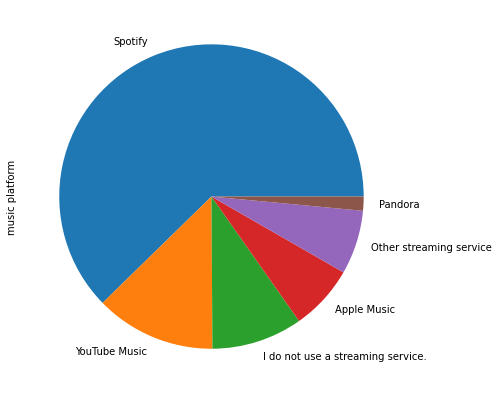

In [12]:
plt.figure(figsize=(15, 7))
df['music platform'].value_counts().plot.pie()

Below scatter plot shows that there is **no relationship** of age and average hours spending listening to music per day, because there is no pattern seen in the graph.

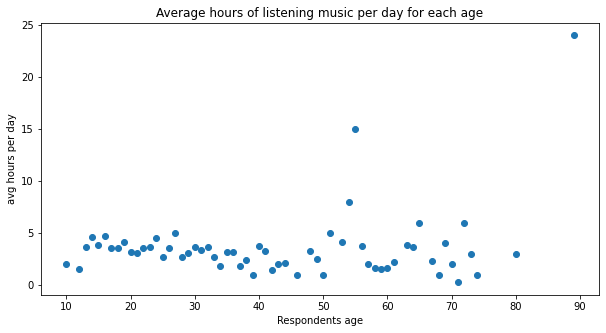

In [13]:
avg_hours_per_age = df.groupby('age')['hours per day'].mean().reset_index(name='avg hours per day')
plt.figure(figsize=(10, 5))
plt.scatter(avg_hours_per_age['age'], avg_hours_per_age['avg hours per day'])
plt.title("Average hours of listening music per day for each age")
plt.xlabel('Respondents age')
plt.ylabel('avg hours per day')
plt.show()

Below pie chart shows that most of respondents listen to music while working/studying. 

Second chart shows that becoming older most people listen to music rarely while working.But younger respondents acts conversely.

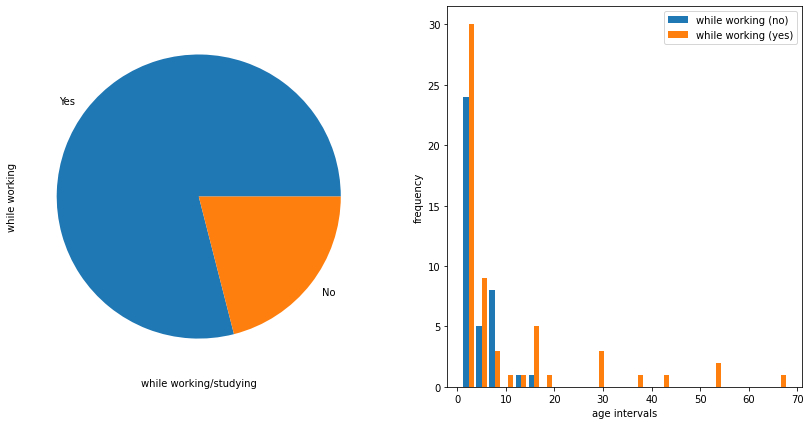

In [14]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
df['while working'].value_counts().plot.pie()
plt.xlabel('while working/studying')
plt.subplot(1,2,2)
age_working = df.groupby(['while working', 'age'])['age'].count().unstack()
# age_working.plot(kind = 'bar')
plt.hist(age_working, bins = 25)
plt.legend(['while working (no)','while working (yes)'])
plt.xlabel('age intervals')
plt.ylabel('frequency')
plt.show()

In [15]:
age_working = df.groupby('while working')['age'].count().reset_index(name='count')
age_working

,while working,count
0,No,154
1,Yes,579


avg hours per day that is spent for listening to music for instrumentalists and not

In [16]:
instrumental_hours = df.groupby('instrumentalist')['hours per day'].mean()
instrumental_hours

instrumentalist
No     3.612072
Yes    3.469574
Name: hours per day, dtype: float64

average age of instrumentalists and not instrumentalists

In [17]:
instrumental_avg_age = df.groupby('instrumentalist')['age'].mean()
instrumental_avg_age

instrumentalist
No     26.327968
Yes    22.965957
Name: age, dtype: float64

In [18]:
pd.crosstab(df['instrumentalist'], df['composer'])

composer,No,Yes
instrumentalist,,
No,464,33
Yes,143,92


Visualizing the relationship between **instrumentalist** and **composer** variables.As we notice, there is *no correlation* between them, because the grouped bars are of same length for each category. 

  instrumentalist composer  count
0              No       No    464
1              No      Yes     33
2             Yes       No    143
3             Yes      Yes     92


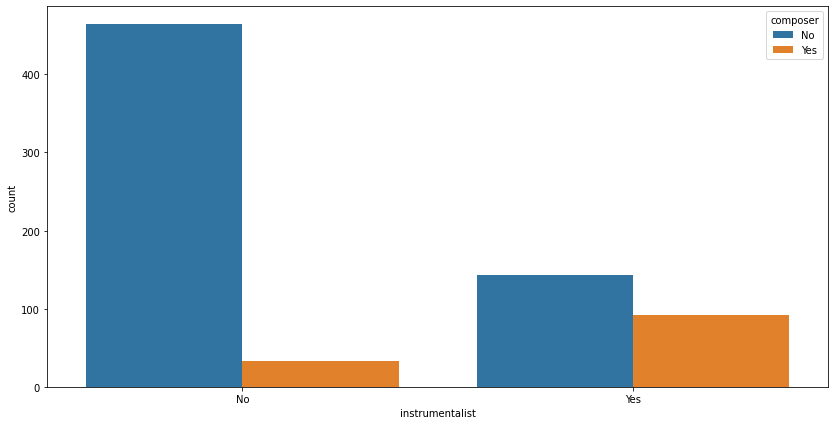

In [56]:
cross_df = df.groupby(['instrumentalist','composer'])['age'].count().reset_index(name='count')
print(cross_df)
plt.figure(figsize=(14, 7))
sns.barplot(x=cross_df['instrumentalist'], y= cross_df['count'], hue=cross_df.composer)
plt.show()

Visualizing the distribution of **fav genre** categorical variable by 2 methods: bar and pie charts. 
Conclusion: mode fav genre - Rock.

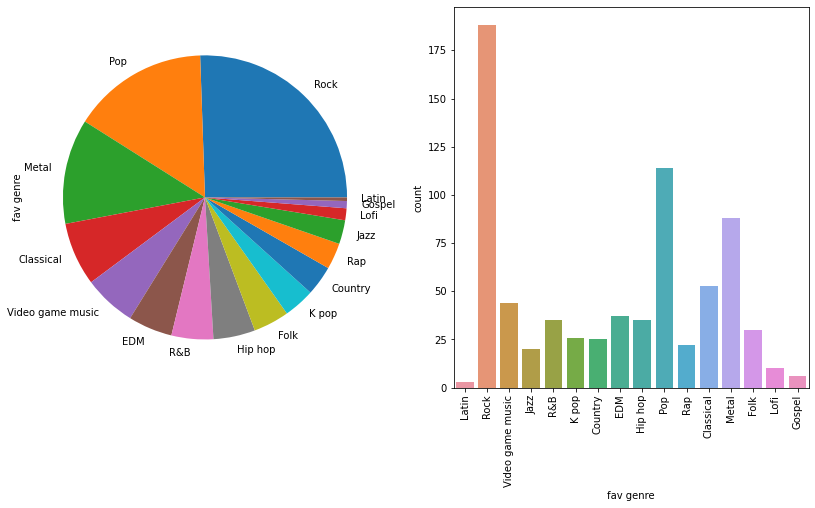

In [20]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
df['fav genre'].value_counts().plot.pie()
plt.subplot(1,2,2)
sns.countplot(x='fav genre', data = df)
plt.xticks(rotation=90, size=10)
plt.show()

below histogram shows that exploratory of new genres is reduced becoming older.And younger respondents(teenagers) open to exploring new genres

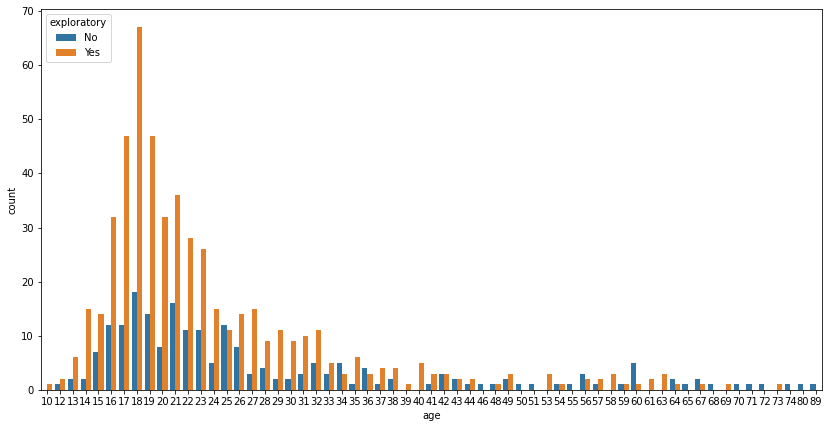

In [66]:
# exploratory_age = df.groupby(['exploratory', 'age'])['age'].count().unstack()
# plt.hist(exploratory_age,bins = 10)
# plt.legend(['exploratory(no)', 'exploratory(yes)'])

exploratory_age = df.groupby(['exploratory', 'age'])['age'].count().reset_index(name='count')
plt.figure(figsize=(14, 7))
sns.barplot(x=exploratory_age['age'], y=exploratory_age['count'], hue=exploratory_age['exploratory'])
plt.show()

Visualizations for anxiety and all genre frequency categories.

As we notice, for genres:**pop, rock, metal** - *very frequently* bar is much higher than other subcategories and somehow increased along the anxiety rating.
Conclusion:People who listens to these genres of music very frequently, may have relative problems with anxiety.  


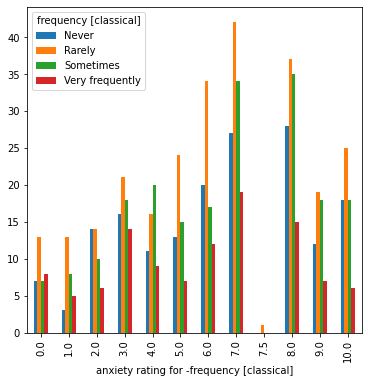

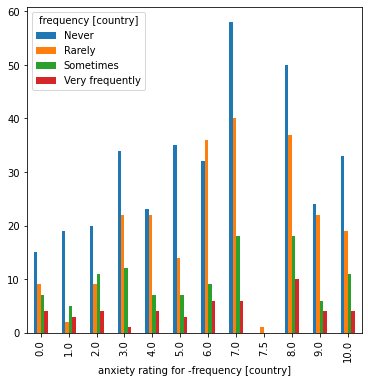

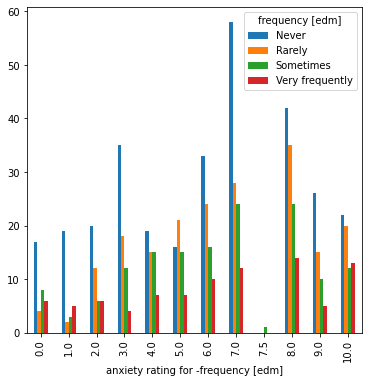

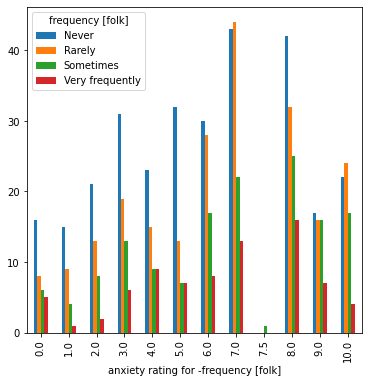

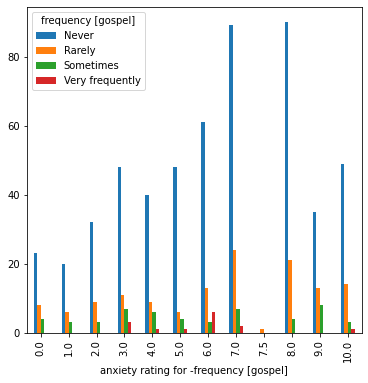

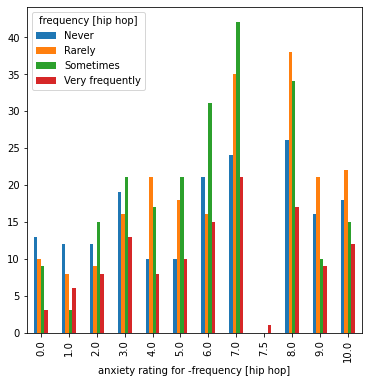

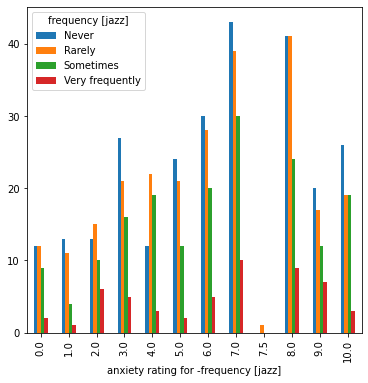

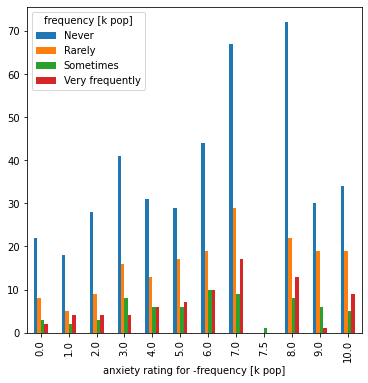

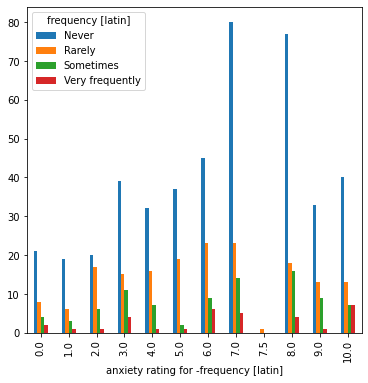

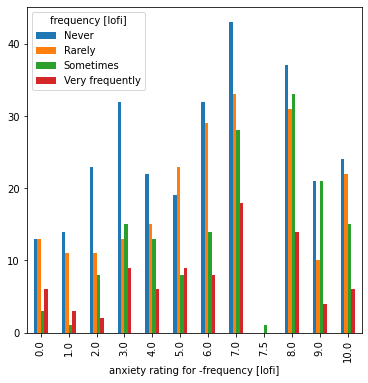

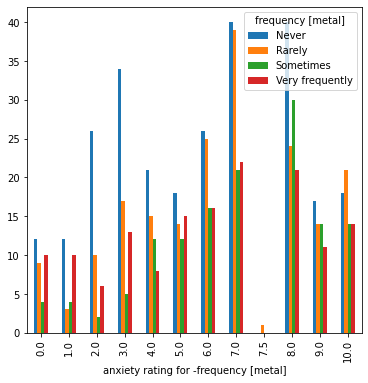

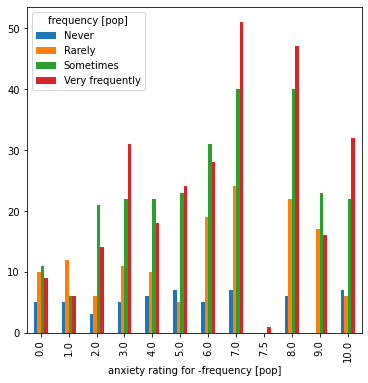

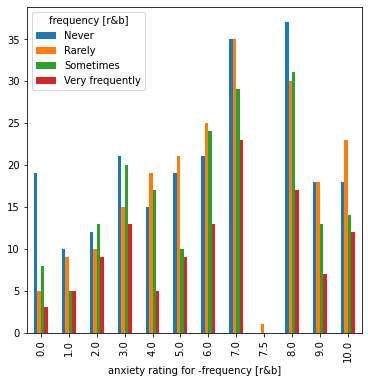

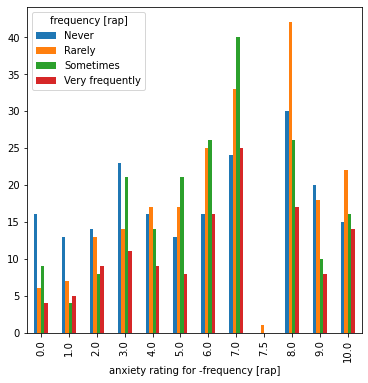

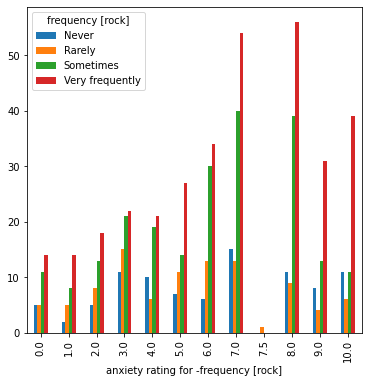

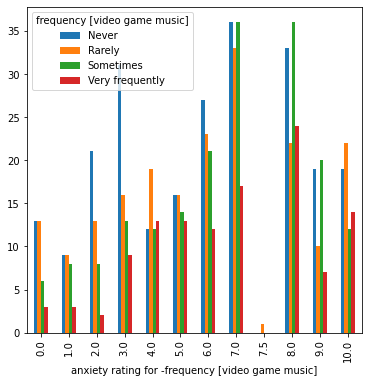

In [24]:
freq_columns = ['frequency [classical]',
       'frequency [country]', 'frequency [edm]', 'frequency [folk]',
       'frequency [gospel]', 'frequency [hip hop]', 'frequency [jazz]',
       'frequency [k pop]', 'frequency [latin]', 'frequency [lofi]',
       'frequency [metal]', 'frequency [pop]', 'frequency [r&b]',
       'frequency [rap]', 'frequency [rock]', 'frequency [video game music]']
for col in freq_columns:
  anxiety_genre_freq = df.groupby(['anxiety', col])['age'].count().unstack()
  anxiety_genre_freq.plot(kind='bar', figsize=(6,6))
  plt.xlabel('anxiety rating for -' + col)
  plt.ylabel('count')
plt.show()

Visualization for depression rating and frequency of listening to all genres of music. 
Conclusions:most people who vote for higher depression ratings **very frequently** listen to these genres of music:**pop, rock**; sometimes - **rap, r&b**.
But most of them **never** listen to genres are: **country, edm, folk, gospel, latin, k-pop.**

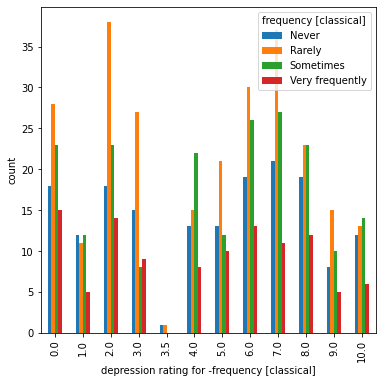

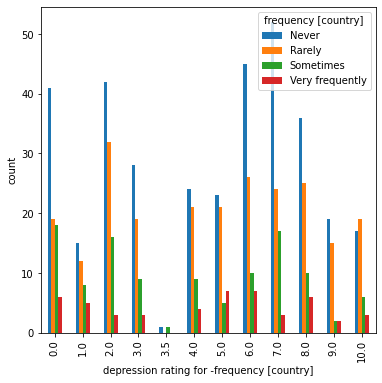

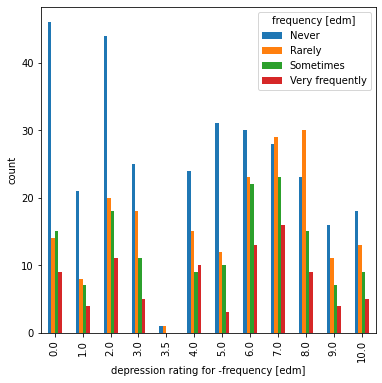

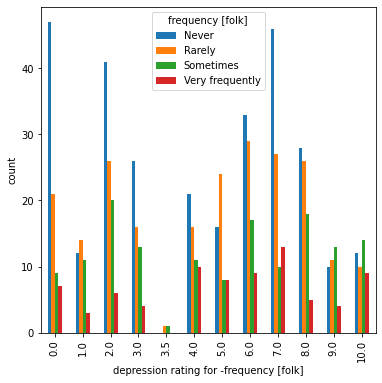

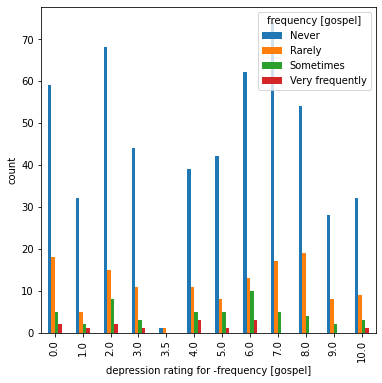

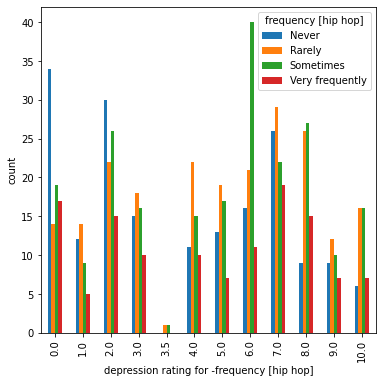

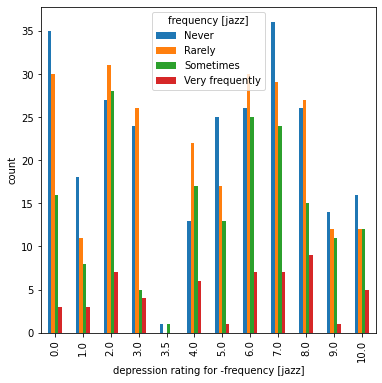

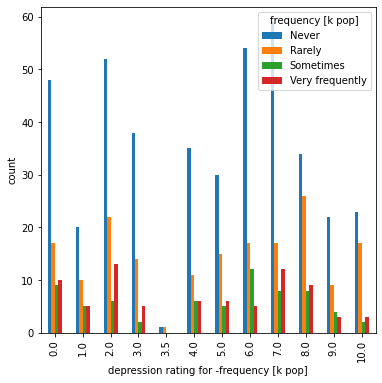

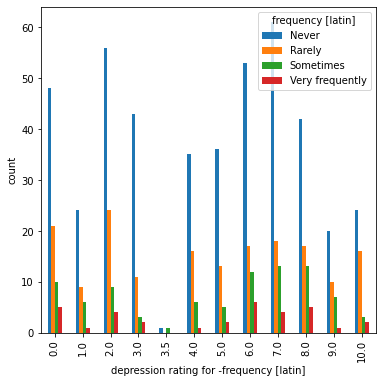

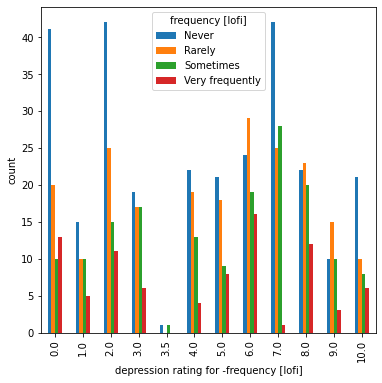

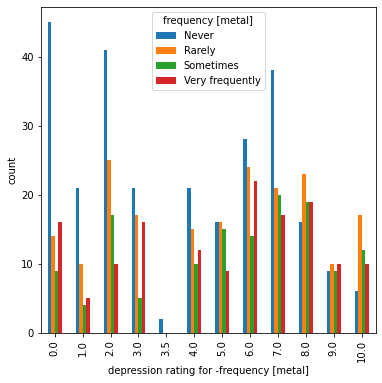

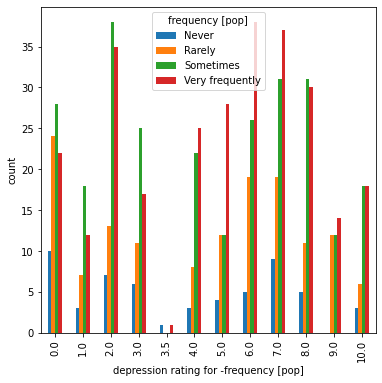

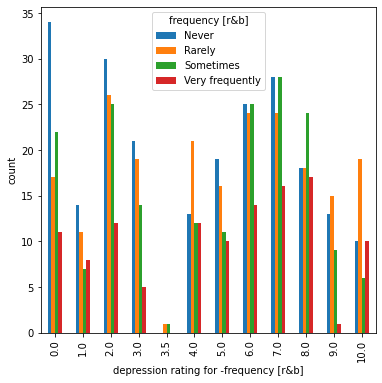

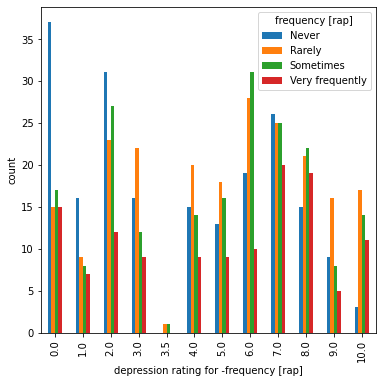

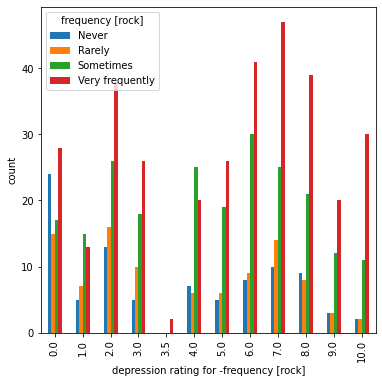

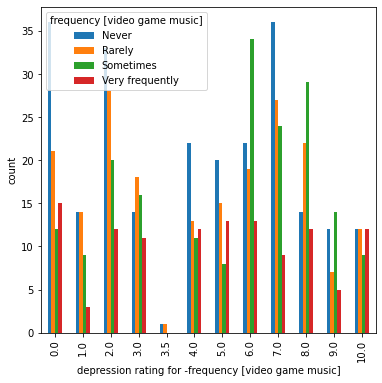

In [25]:
for col in freq_columns:
  depression_genre_freq = df.groupby(['depression', col])['age'].count().unstack()
  depression_genre_freq.plot(kind='bar', figsize=(6,6))
  plt.xlabel('depression rating for -' + col)
  plt.ylabel('count')
plt.show()

Visualization for insomnia rating and frequency of listening to all genres of music. Conclusions:most people who vote for higher insomnia ratings **very frequently** listen to these genres of music***:hip-hop,pop, rock.***

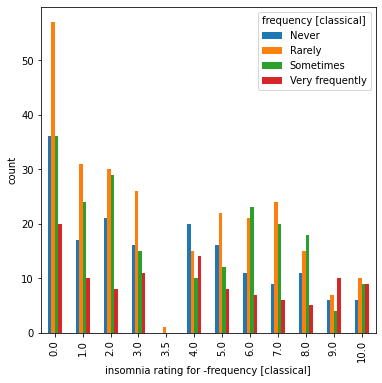

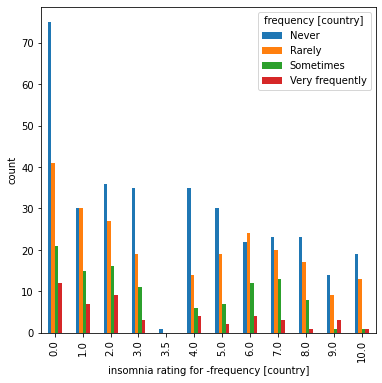

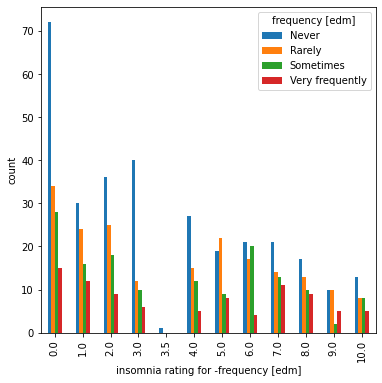

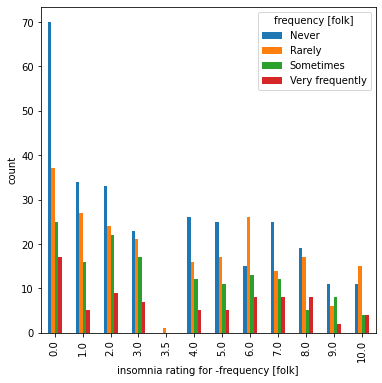

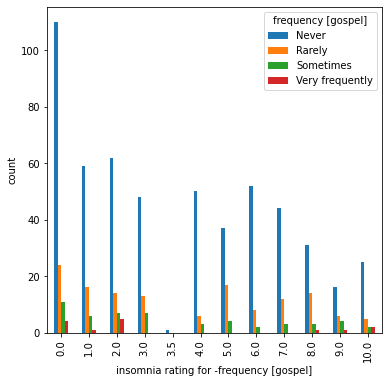

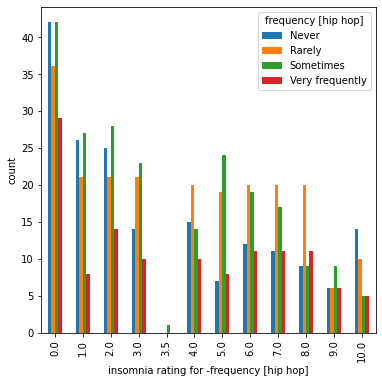

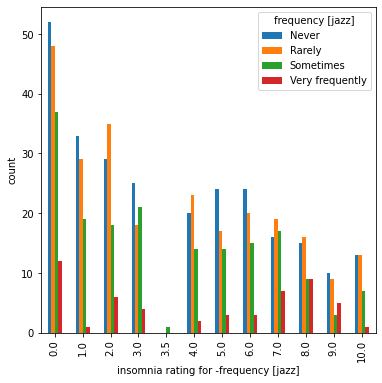

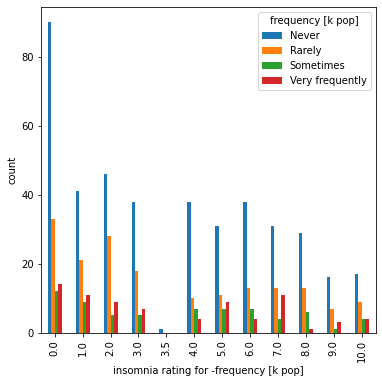

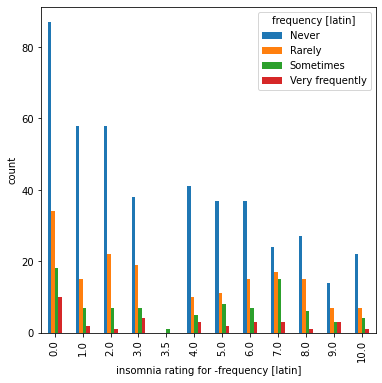

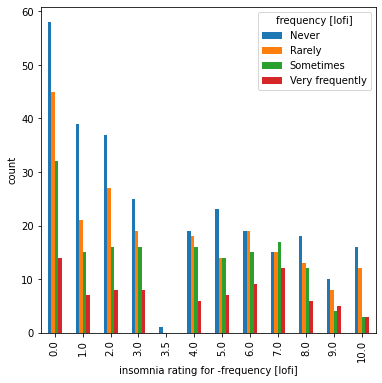

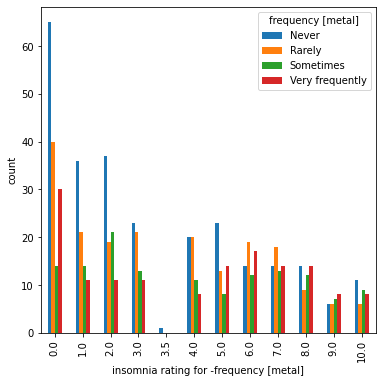

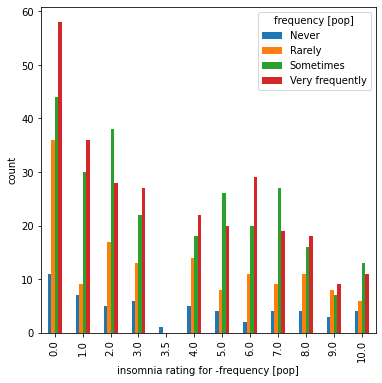

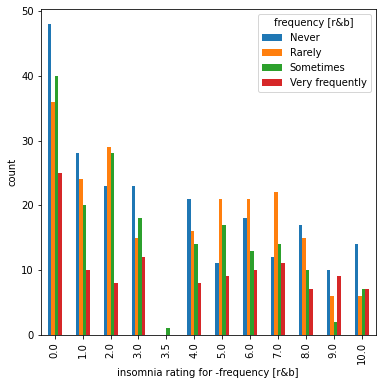

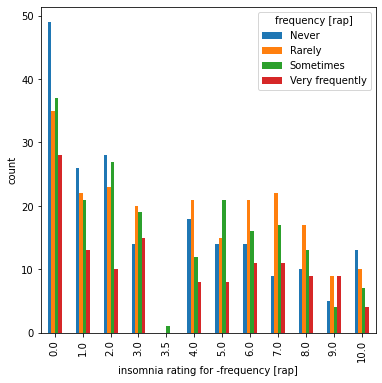

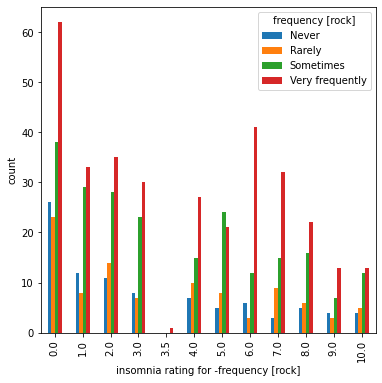

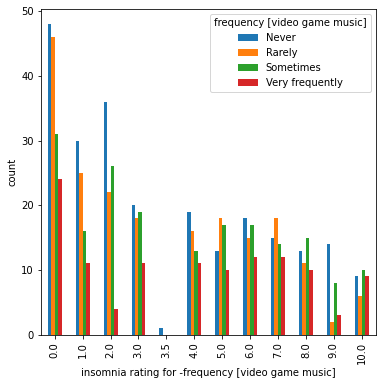

In [26]:
for col in freq_columns:
  depression_genre_freq = df.groupby(['insomnia', col])['age'].count().unstack()
  depression_genre_freq.plot(kind='bar', figsize=(6,6))
  plt.xlabel('insomnia rating for -' + col)
  plt.ylabel('count')
plt.show()

For most people music therapy improves their wellness or mental health.

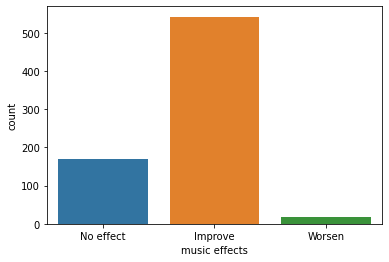

In [32]:
sns.countplot(x='music effects', data=df)